### Import libraries

In [1]:
import os
import random
import numpy as np
from io import BytesIO

# Plotting and dealing with images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf

# Interactive widgets
from ipywidgets import widgets

### Inspect the dataset

In [2]:
Images_Dir = 'PetImages'

# Directory with cats pictures
cat_dir = os.path.join(Images_Dir, 'Cat')
# Directory with dogs pictures
dog_dir = os.path.join(Images_Dir, 'Dog')

### Now see what's the files name looks like in these directories

In [3]:
cat_names = os.listdir(cat_dir)
print(f'TRAIN SET HORSES: {cat_names[:10]}')

dog_names = os.listdir(dog_dir)
print(f'TRAIN SET HUMANS: {dog_names[:10]}')

TRAIN SET HORSES: ['0.jpg', '1.jpg', '10.jpg', '100.jpg', '1000.jpg', '10000.jpg', '10001.jpg', '10002.jpg', '10003.jpg', '10004.jpg']
TRAIN SET HUMANS: ['0.jpg', '1.jpg', '10.jpg', '100.jpg', '1000.jpg', '10000.jpg', '10001.jpg', '10002.jpg', '10003.jpg', '10004.jpg']


### Total numbers of images in the directory

In [4]:
print(f'total cats images: {len(os.listdir(cat_dir))}')
print(f'total dogs images: {len(os.listdir(dog_dir))}')

total cats images: 12501
total dogs images: 12501


### Now take a look at a few pictures to get a better sense of what they look like. Display a batch of 10 cats and 10 dogs pictures. You can rerun the cell to see a fresh batch each time:

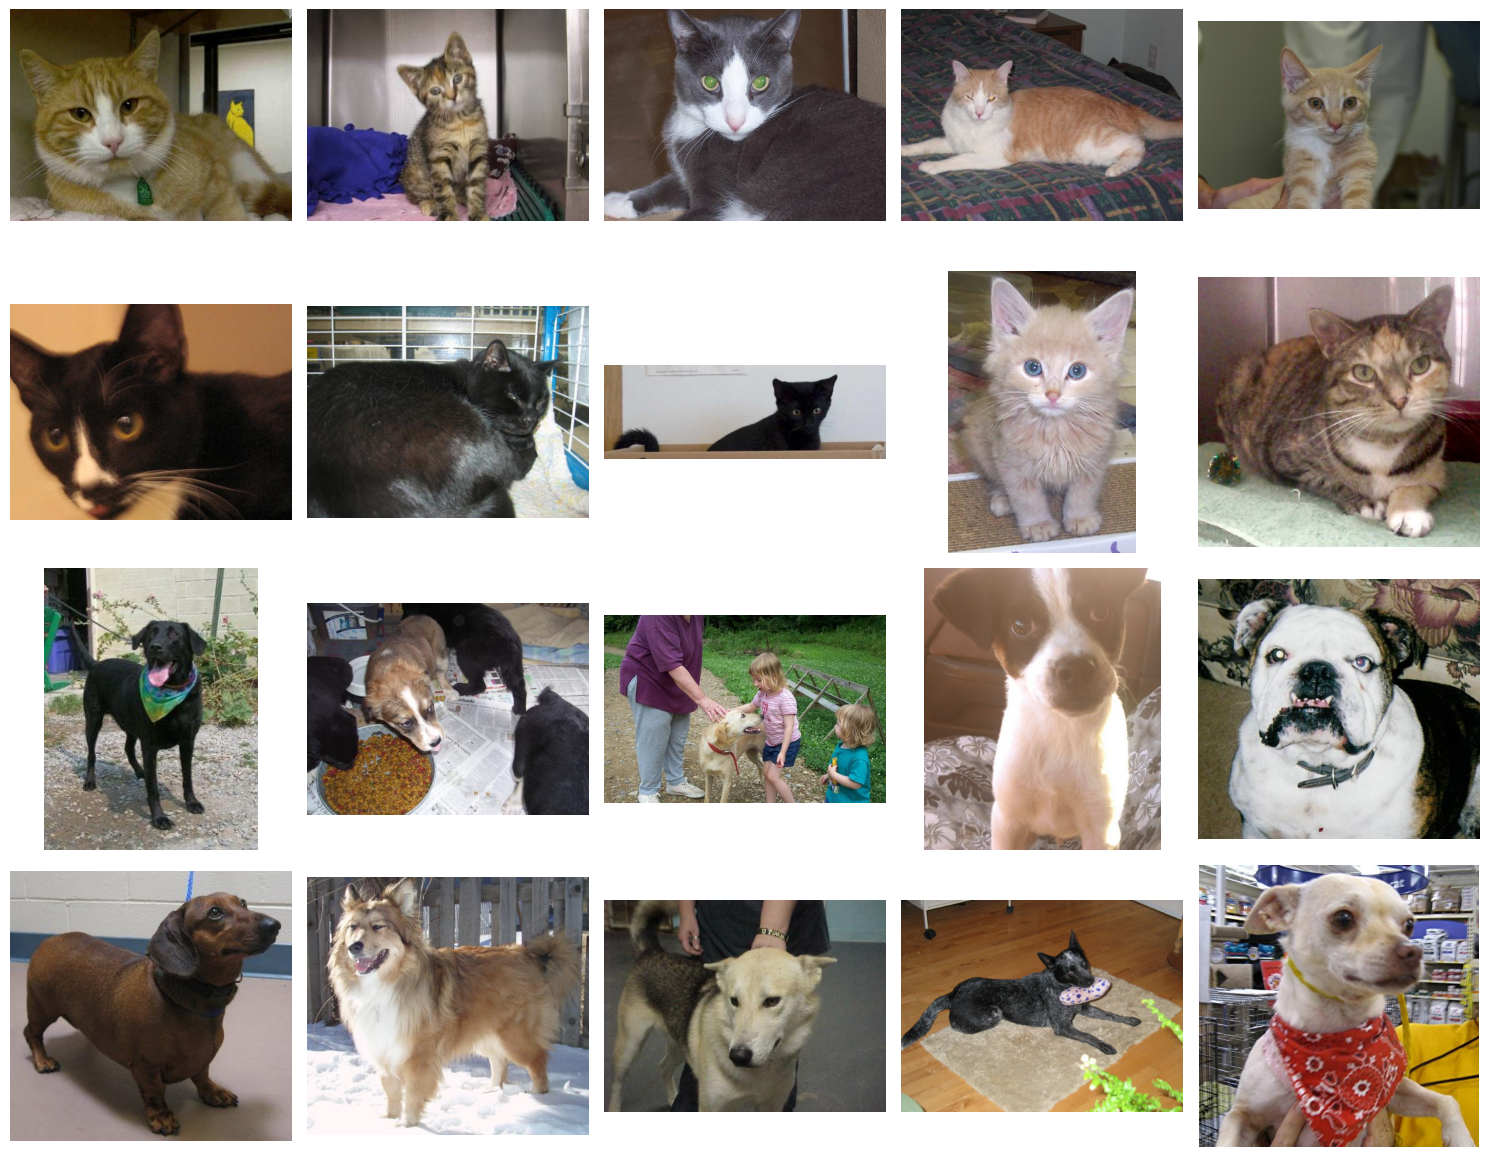

In [8]:
# Parameters for your graph; output images in a 5x5 configuration
nrows = 5
ncols = 5

# Set up matplotlib fig, and size it to fit 5x5 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 3, nrows * 3)

# Get a list of all cat and dog image filenames
cat_names = os.listdir(cat_dir)
dog_names = os.listdir(dog_dir)

# Randomly sample 10 images from each directory
next_cat_pix = [os.path.join(cat_dir, fname) for fname in random.sample(cat_names, k=10)]
next_dog_pix = [os.path.join(dog_dir, fname) for fname in random.sample(dog_names, k=10)]

# Combine the lists for display
images_to_display = next_cat_pix + next_dog_pix

for i, img_path in enumerate(images_to_display):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')  # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


### `Building a Small Model from Scratch`

In [9]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.Input(shape=(300, 300, 3)),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0 to 1 where 0 is for 'horses' and 1 for 'humans'
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#### You can review the network architecture and the output shapes with `model.summary()`.

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 298, 298, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 149, 149, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 147, 147, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 73, 73, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 71, 71, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 35, 35, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 33, 33, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,606,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,704,097 (6.50 MB)

 Trainable params: 1,704,097 (6.50 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

### Data Preprocessing
- Now you will setup the datasets with the tf.data API. It will mostly be the same as last time but notice the additional code to also prepare the validation data.

In [12]:
# Parameters
batch_size = 32
image_size = (300, 300)  # Adjust to your model's input size

#### Create a dataset from the directories

In [13]:
dataset = tf.keras.utils.image_dataset_from_directory(
    Images_Dir,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='binary',  # Use binary for two classes (cats and dogs)
    shuffle=True,  # Shuffle the dataset
    seed=123  # For reproducibility
)

Found 25000 files belonging to 2 classes.


#### Split into training and validation sets

In [14]:
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

train_dataset = dataset.take(train_size)
validation_dataset = dataset.skip(train_size)

In [15]:
# Rescale pixel values
rescale_layer = tf.keras.layers.Rescaling(1./255)

# Apply rescaling to both datasets
train_dataset = train_dataset.map(lambda x, y: (rescale_layer(x), y))
validation_dataset = validation_dataset.map(lambda x, y: (rescale_layer(x), y))

# Cache and prefetch for performance
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [16]:
# Print the sizes
print(f'Training dataset size: {len(train_dataset)}')
print(f'Validation dataset size: {len(validation_dataset)}')

Training dataset size: 625
Validation dataset size: 157


Training
Now train the model for 15 epochs. Here, you will pass parameters for validation_data and validation_steps. With these, you will notice additional outputs in the print statements: val_loss and val_accuracy. Notice that as you train with more epochs, your training accuracy might go up but your validation accuracy goes down. This can be a sign of overfitting and you need to prevent your model from reaching this point.